In [119]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
def generate_output(preds, filename):
    df = pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds})
    df.to_csv(filename + '.csv', index=False, header=True)

In [121]:
def normalize_image(X):
    return X/255

In [122]:
def densenet():
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, kernel_initializer='lecun_uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(128, input_dim=128, kernel_initializer='lecun_uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, input_dim=128, kernel_initializer='lecun_uniform'))
    model.add(Activation('sigmoid'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [123]:
def convnet():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adadelta(),
    metrics=['accuracy'])
    return model 

In [124]:
# Read data
train = pd.read_csv('data/train.csv')
labels = train.iloc[:,0].values.astype('int32')
X_train = (train.iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv('data/test.csv').values).astype('float32')

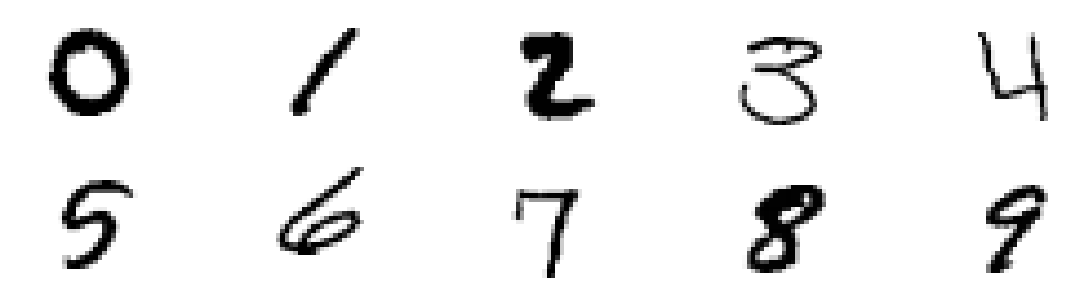

In [125]:
plt.figure(figsize=(20,5))
for i in range(0, 10):
    ind = np.where(labels==i)[0][0]
    digit = X_train[ind,:].reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(digit, cmap=plt.cm.gray_r)
    plt.axis('off')

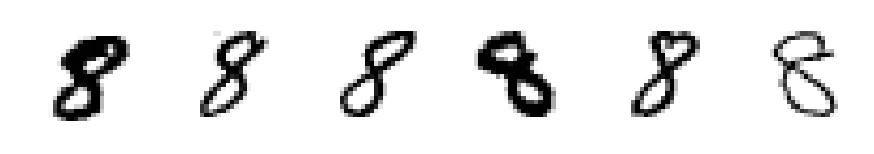

In [126]:
plt.figure(figsize=(15,5))
for i in range(0, 6):
    ind = np.where(labels==8)[0][i]
    digit = X_train[ind,:].reshape(28,28)
    plt.subplot(1,6,i+1)
    plt.imshow(digit, cmap=plt.cm.gray_r)
    plt.axis('off')

In [127]:
# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 

X_train= normalize_image(X_train)
X_test= normalize_image(X_test)

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]    

In [128]:
img_rows=28
img_cols=28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [129]:
convnet = convnet()

In [130]:
print("Training convnet...")
convnet.fit(X_train, y_train, nb_epoch=15, batch_size=16, verbose=1)

Training convnet...
Epoch 1/15
42000/42000 [==============================] - 61s - loss: 0.4077 - acc: 0.8760    
Epoch 2/15
42000/42000 [==============================] - 68s - loss: 0.2024 - acc: 0.9416    
Epoch 3/15
42000/42000 [==============================] - 63s - loss: 0.1487 - acc: 0.9560    
Epoch 4/15
42000/42000 [==============================] - 63s - loss: 0.1285 - acc: 0.9628    
Epoch 5/15
42000/42000 [==============================] - 59s - loss: 0.1137 - acc: 0.9668    
Epoch 6/15
42000/42000 [==============================] - 57s - loss: 0.1039 - acc: 0.9695    
Epoch 7/15
42000/42000 [==============================] - 55s - loss: 0.0978 - acc: 0.9710    
Epoch 8/15
42000/42000 [==============================] - 54s - loss: 0.0943 - acc: 0.9723    
Epoch 9/15
42000/42000 [==============================] - 55s - loss: 0.0911 - acc: 0.9729    
Epoch 10/15
42000/42000 [==============================] - 54s - loss: 0.0907 - acc: 0.9739    
Epoch 11/15
42000/42000 [====

In [131]:
print("Generating test predictions for convnet...")
convnet_preds = convnet.predict_classes(X_test, verbose=0)
generate_output(convnet_preds, "convnet_digit_recogition")

Generating test predictions for convnet...


In [132]:
densenet = densenet()

In [134]:
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

In [135]:
print("Training densenet...")
densenet.fit(X_train, y_train, nb_epoch=15, batch_size=16, verbose=1)

Training densenet...
Epoch 1/15
42000/42000 [==============================] - 10s - loss: 0.0386    
Epoch 2/15
42000/42000 [==============================] - 10s - loss: 0.0183    
Epoch 3/15
42000/42000 [==============================] - 9s - loss: 0.0152     
Epoch 4/15
42000/42000 [==============================] - 9s - loss: 0.0138     
Epoch 5/15
42000/42000 [==============================] - 10s - loss: 0.0128    
Epoch 6/15
42000/42000 [==============================] - 9s - loss: 0.0120     
Epoch 7/15
42000/42000 [==============================] - 11s - loss: 0.0113    
Epoch 8/15
42000/42000 [==============================] - 9s - loss: 0.0109     
Epoch 9/15
42000/42000 [==============================] - 11s - loss: 0.0104    
Epoch 10/15
42000/42000 [==============================] - 9s - loss: 0.0101     
Epoch 11/15
42000/42000 [==============================] - 9s - loss: 0.0098     
Epoch 12/15
42000/42000 [==============================] - 9s - loss: 0.0099     
Epoc

In [136]:
print("Generating test predictions for densenet...")
densenet_preds = densenet.predict_classes(X_test, verbose=0)
generate_output(densenet_preds, "dense_net_digit_recogition")

Generating test predictions for densenet...
